In [1]:
import sys
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [8]:
tk = th.Thicket.from_caliperreader(glob("CombinedStrongScalingSmall/*.cali")) # Change depending on what we're tryna get

(1/2) Reading Files:   0%|          | 0/140 [00:00<?, ?it/s]

(2/2) Creating Thicket: 100%|██████████| 139/139 [00:00<00:00, 165.82it/s]
/home/ado/.local/lib/python3.10/site-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [3]:
tk.metadata.head()

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,
4470530,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p16-a67108864-sradix-irandom.cali,true,true,true,true,1729634306,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 67108864, radix, random]",c,radix,mpi,int,4,67108864,random,16,8,online
4878226,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a1048576-sradix-i1perturbed.cali,true,true,true,true,1729639993,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 1048576, radix, 1perturbed]",c,radix,mpi,int,4,1048576,1perturbed,32,8,online
28339909,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p64-a262144-sradix-ireverse.cali,true,true,true,true,1729639001,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 262144, radix, reverse]",c,radix,mpi,int,4,262144,reverse,64,8,online
30793891,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p16-a67108864-sradix-isorted.cali,true,true,true,true,1729634203,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 67108864, radix, sorted]",c,radix,mpi,int,4,67108864,sorted,16,8,online
55640694,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p128-a268435456-sradix-i1perturbed.cali,true,true,true,true,1729643529,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, radix, 1perturbed]",c,radix,mpi,int,4,268435456,1perturbed,128,8,online


In [4]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

8.236 main
├─ 1.826 MPI_Comm_dup
├─ 0.021 MPI_Comm_split
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 2.457 comm
│  └─ 2.457 comm_large
│     ├─ 0.039 MPI_Allreduce
│     ├─ 0.015 MPI_Alltoall
│     ├─ 0.053 MPI_Alltoallv
│     ├─ 0.270 MPI_Bcast
│     ├─ 0.012 MPI_Gather
│     ├─ 1.958 MPI_Gatherv
│     └─ 0.109 MPI_Scatterv
├─ 0.656 comp
│  ├─ 0.627 comp_large
│  └─ 0.029 comp_small
├─ 0.115 correctness_check
└─ 0.169 data_init_runtime
   └─ 0.033 MPI_Gather

Legend (Metric: Avg time/rank Min: 0.00 Max: 8.24 indices: {'profile': 4470530})
█ 7.41 - 8.24
█ 5.76 - 7.41
█ 4.12 - 5.76
█ 2.47 - 4.12
█ 0.82 - 2.47
█ 0.00 - 0.82

name User code    ◀  Only in left graph    ▶  Only in right graph



In [9]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("algorithm")
tk.dataframe = tk.dataframe.reset_index()
tk.dataframe.head()

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size,algorithm
0,"{'name': 'main', 'type': 'function'}",72264011,1.0,regionprofile,1.994812,2.070534,2.052240,1050.747038,0.000261,1.811109,1.970167,1.884937,965.087575,NaN,NaN,NaN,NaN,main,512,random,65536,radix
1,"{'name': 'main', 'type': 'function'}",77680691,1.0,regionprofile,0.797502,0.801187,0.800028,12.800443,0.000002,0.761038,0.766125,0.763894,12.222306,NaN,NaN,NaN,NaN,main,16,random,65536,bitonic
2,"{'name': 'main', 'type': 'function'}",85744897,1.0,regionprofile,2.092617,2.176591,2.157271,1104.522544,0.000101,1.682188,1.883227,1.777513,910.086737,NaN,NaN,NaN,NaN,main,512,1perturbed,65536,merge
3,"{'name': 'main', 'type': 'function'}",85783573,1.0,regionprofile,1.577041,1.620611,1.616476,51.727231,0.000056,1.493620,1.538502,1.532724,49.047169,NaN,NaN,NaN,NaN,main,32,random,65536,merge
4,"{'name': 'main', 'type': 'function'}",149572322,1.0,regionprofile,1.623280,1.628990,1.627059,52.065903,0.000003,1.562424,1.573264,1.568650,50.196802,NaN,NaN,NaN,NaN,main,32,sorted,65536,sample


In [6]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
    marker='o',
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    figsize=(15,7)
    )
    return plot

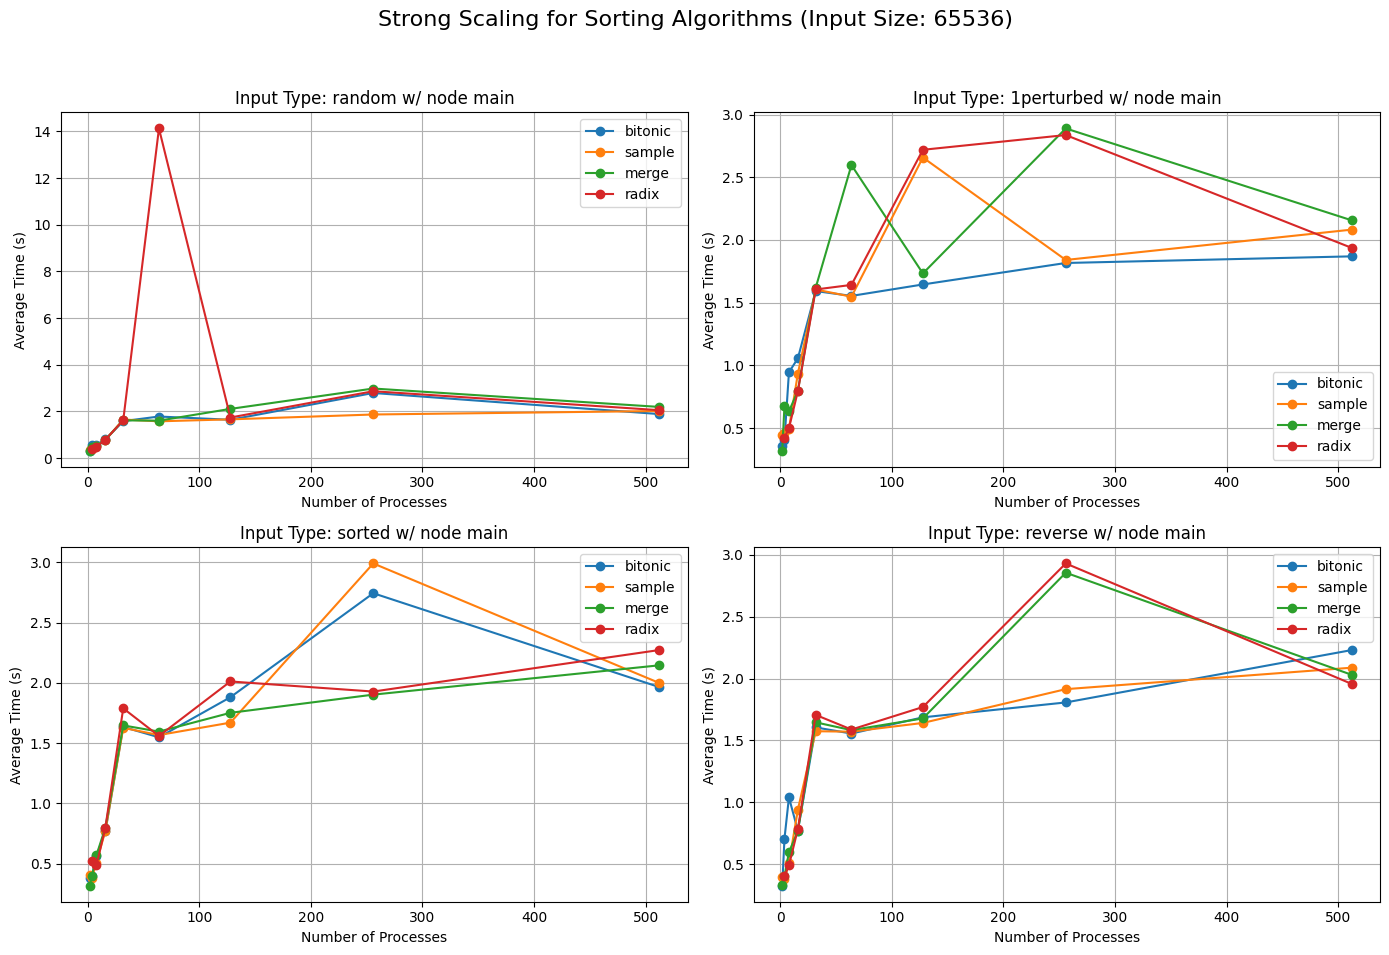

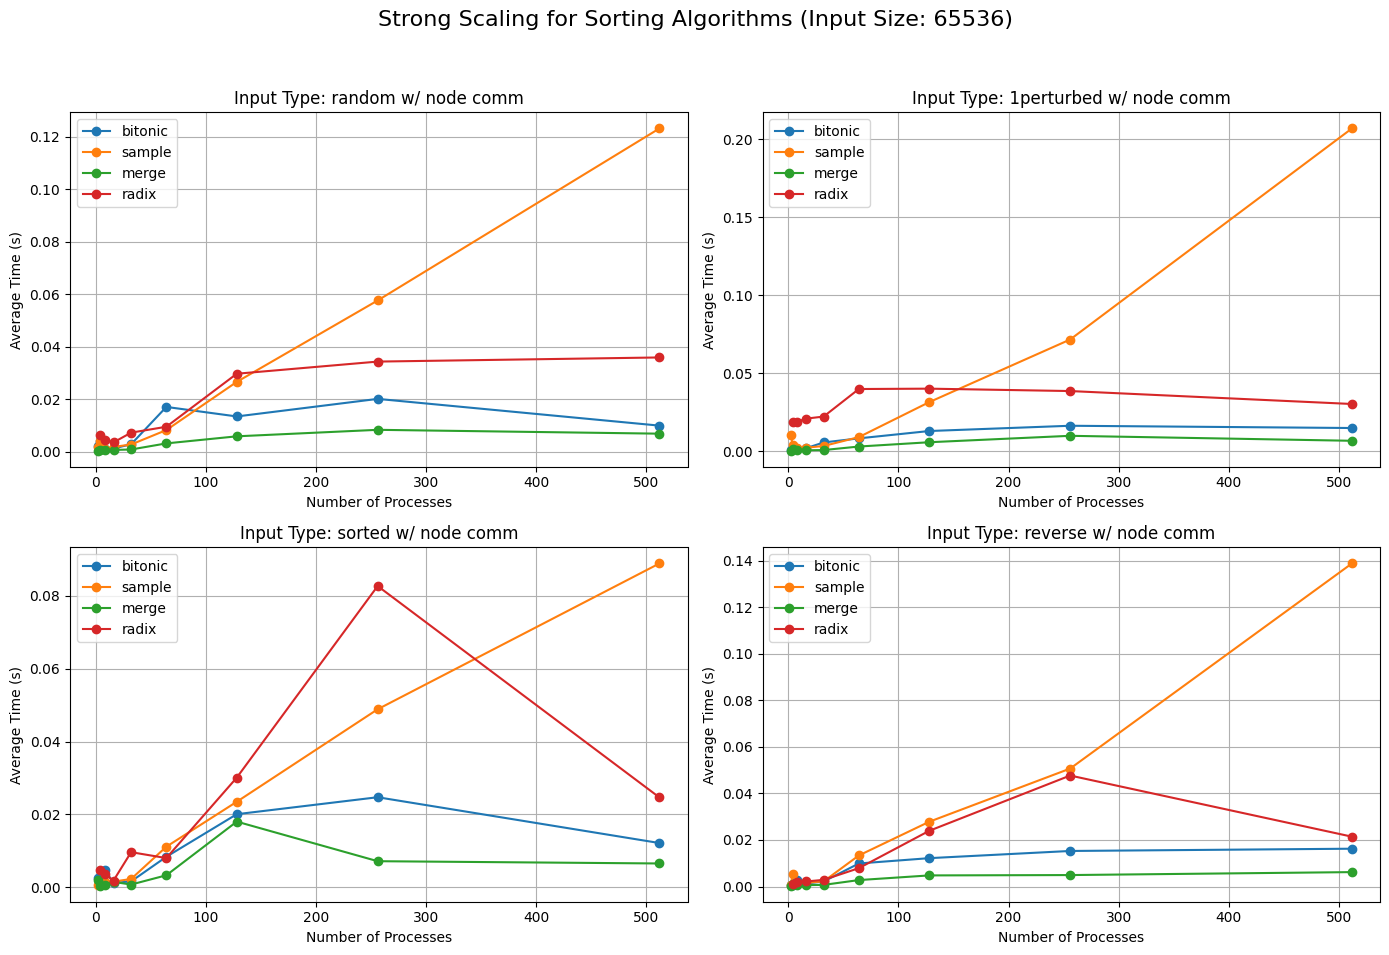

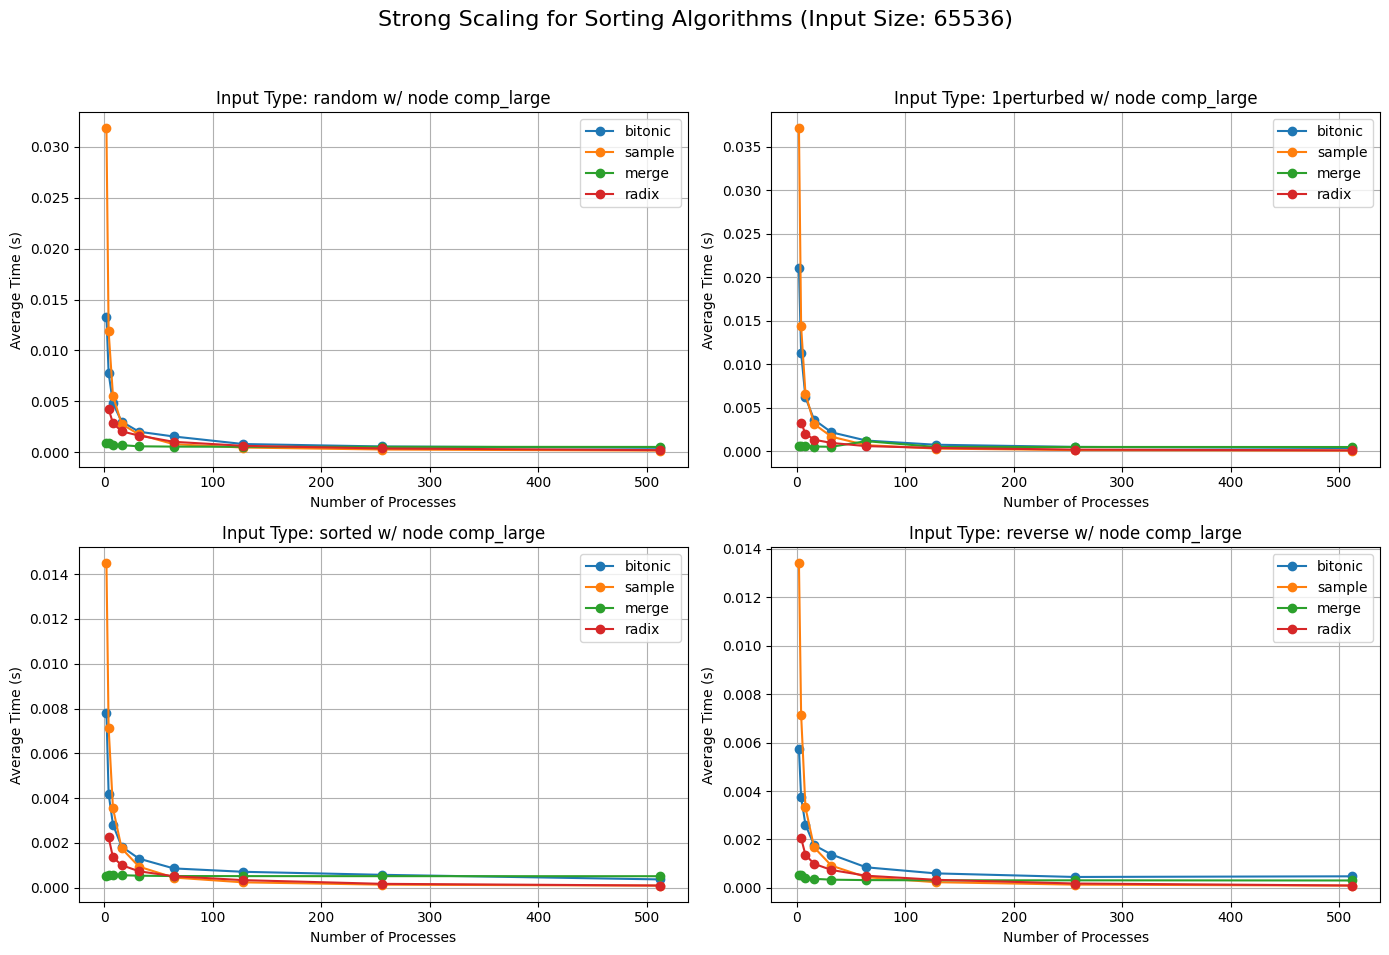

In [12]:
import os

# Input types and sorting algorithms
input_types = ["random", "1perturbed", "sorted", "reverse"]
sorting_algorithms = ["bitonic", "sample", "merge", "radix"]
input_size = 65536  # Fixed input size for strong scaling (268435456)

# Prepare output folder for plots
output_dir = '../plot_outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to create strong scaling plots
def plot_strong_scaling(tk):
    target_nodes = ['comp_large', 'comm', 'main']
    for node in tk.graph.traverse():
        node_name = node.frame['name']

        # Skip node names not in nodes
        if node_name not in target_nodes:
            continue

        fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid for the 4 input types
        axs = axs.flatten()  # Flatten to 1D array for easy iteration

        for idx, input_type in enumerate(input_types):
            ax = axs[idx]  # Select the appropriate subplot

            for algo in sorting_algorithms:
                # Filter the dataframe for the current input type and sorting algorithm
                data = tk.dataframe[
                    (tk.dataframe["input_type"] == input_type) &
                    (tk.dataframe["input_size"] == input_size) &
                    (tk.dataframe["algorithm"] == algo) & 
                    (tk.dataframe['node'] == node)
                ]

                # If the node is 'comp_large', exclude the rows where num_procs == 2 for large strong scaling or it makes the graph unreadable
                '''
                if node_name == 'comp_large':
                    data = data[data["num_procs"] != 2]
                '''

                if data.empty:
                    print(f"No data found for input_type={input_type}, sorting_algo={algo}. Skipping.")
                    continue

                # Sort data by number of processors to ensure proper plotting
                data = data.sort_values(by="num_procs")

                # Plot the data for the algorithm
                ax.plot(
                    data["num_procs"],
                    data["Avg time/rank"],  # Y-axis as average time per rank
                    marker='o',
                    label=algo  # Use the sorting algorithm as the label
                )

            # Set subplot titles and labels
            ax.set_title(f'Input Type: {input_type} w/ node {node_name}')
            ax.set_xlabel('Number of Processes')
            ax.set_ylabel('Average Time (s)')
            ax.legend()
            ax.grid(True)

        # Set the main title for the entire figure
        fig.suptitle(f'Strong Scaling for Sorting Algorithms (Input Size: {input_size})', fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to accommodate the main title

        # Save plot to file
        filepath = os.path.join(output_dir, f'strong_scaling_input_size_{input_size}.png')
        plt.savefig(filepath, format='png', dpi=300)

        plt.show()

plot_strong_scaling(tk)


In [8]:
tk.dataframe = tk.dataframe.reset_index()#.set_index(["node"])
# tk.dataframe